# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading data
data = pd.read_csv(r"C:\Users\acer\Downloads\car_age_price.csv")

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.shape

(112, 2)

# checking basic details on the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


No missing values present in the dataset

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<AxesSubplot:xlabel='Year'>

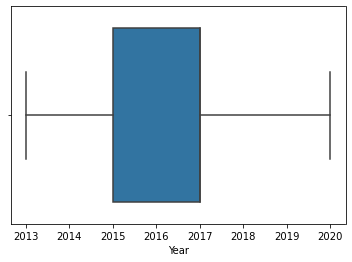

In [8]:
sns.boxplot(data['Year'])

No outliers present in the given dataset

In [9]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [10]:
X = data['Year']
y = data['Price']

In [11]:
X = np.array(X).reshape(-1,1)

# building the model

Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
lr_model = LinearRegression()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [15]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [16]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_mse

4326906256.829671

In [17]:
print(f'model score on training data: {lr_model.score(X_train, y_train)}')
print(f'model score on testing data: {lr_model.score(X_test, y_test)}')

model score on training data: 0.6389354253755697
model score on testing data: 0.36759313425902185


This clearly indicates an overfitting condition

# Prediction  for price on 2022 on Linear Regression model

In [18]:
lr_model.predict([[2022]])

array([743601.61594504])

Lasso Regression Model

In [19]:
#for finding the best value for alpha we use GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [20]:
model = Lasso()
params = {'alpha': np.arange(1e-15, 100)}
ls_regressor = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)

ls_regressor.fit(X,y)
print(f'The best value for alpha : {ls_regressor.best_params_}')
print(f'MSE : {np.abs(ls_regressor.best_score_)}')

The best value for alpha : {'alpha': 1e-15}
MSE : 3564922131.7258463


In [21]:
y_pred = ls_regressor.predict(X_test)

In [22]:
ls_mse = mean_squared_error(y_test, y_pred)
ls_mse

3652515706.7561846

# Prediction for price on 2022 on Lasso Regression model

In [23]:
ls_regressor.predict([[2022]])

array([715488.07850976])

# Better model

In [24]:
print(f'Mean Squared Error for Linear Regression Model: {lr_mse}')
print(f'Mean Squared Error for Lasso Regression Model: {ls_mse}')

Mean Squared Error for Linear Regression Model: 4326906256.829671
Mean Squared Error for Lasso Regression Model: 3652515706.7561846


Hence we can conclude that lasso regression model preforms better in this case.